In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df['Annual Income (k$)']

0       15
1       15
2       16
3       16
4       17
      ... 
245    297
246    311
247    313
248    316
249    325
Name: Annual Income (k$), Length: 250, dtype: int64

In [8]:
df['Spending Score (1-100)']

0      39
1      81
2       6
3      77
4      40
       ..
245    69
246    14
247    90
248    32
249    86
Name: Spending Score (1-100), Length: 250, dtype: int64

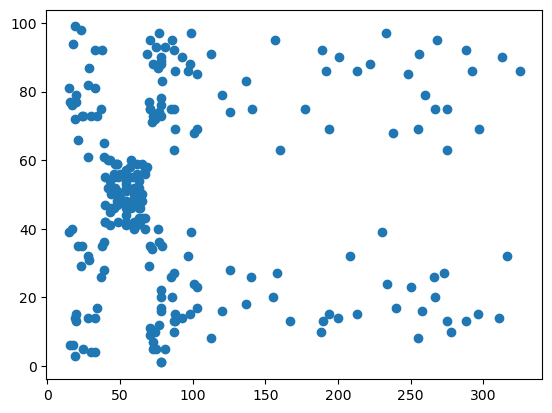

In [9]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [12]:
#we will apply feature scaling to scale the numeric data to a specific range(0 to 1),(-1 to 1)

In [13]:
#standard Scaler -1 to 1
#Min Max Scaler 0-1

In [18]:
df['Gender'].replace("Female",1,inplace=True)

In [19]:
df['Gender'].replace("Male",0,inplace=True)

In [20]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
245,246,0,30,297,69
246,247,1,56,311,14
247,248,0,29,313,90
248,249,1,19,316,32


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_new = sc.fit_transform(df)

In [24]:
final_data = pd.DataFrame(df_new)

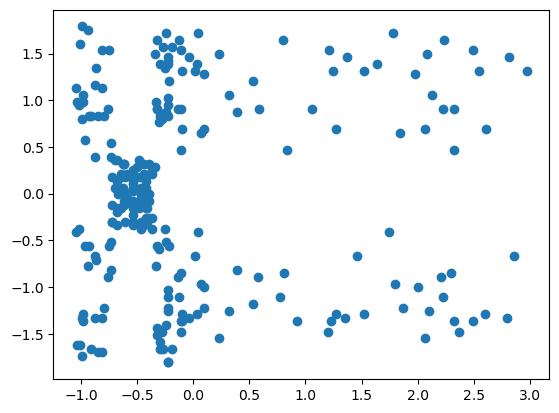

In [26]:
plt.scatter(final_data[3],final_data[4])
plt.show()

In [27]:
#feature scaling , we are not changing the original values, we are just mapping the
#higher range data to lower range data

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_n = sc.fit_transform(df)

In [30]:
f_new = pd.DataFrame(df_n)

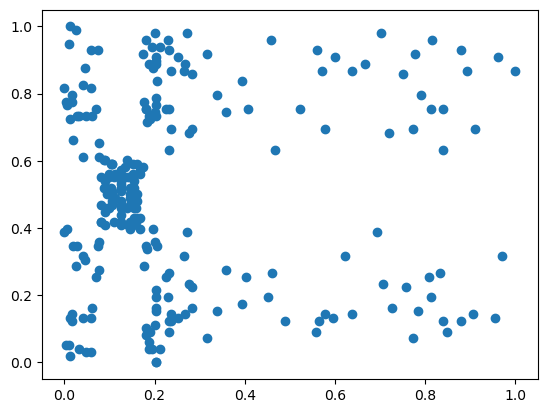

In [32]:
plt.scatter(f_new[3],f_new[4])
plt.show()

In [35]:
#feature engineering
tweets_data = pd.read_csv('Tweets.csv')

In [37]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [38]:
#data type convert
tweets_data['tweet_created'] = pd.to_datetime(tweets_data['tweet_created'])

In [40]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   tweet_id                      14640 non-null  int64                                 
 1   airline_sentiment             14640 non-null  object                                
 2   airline_sentiment_confidence  14640 non-null  float64                               
 3   negativereason                9178 non-null   object                                
 4   negativereason_confidence     10522 non-null  float64                               
 5   airline                       14640 non-null  object                                
 6   airline_sentiment_gold        40 non-null     object                                
 7   name                          14640 non-null  object                        

In [44]:
tweets_data['year'] = tweets_data['tweet_created'].dt.year
tweets_data['month'] = tweets_data['tweet_created'].dt.month
tweets_data['day'] = tweets_data['tweet_created'].dt.day
tweets_data['week'] = tweets_data['tweet_created'].dt.week


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27980\2060280915.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  tweets_data['week'] = tweets_data['tweet_created'].dt.week


In [49]:
tweets_data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

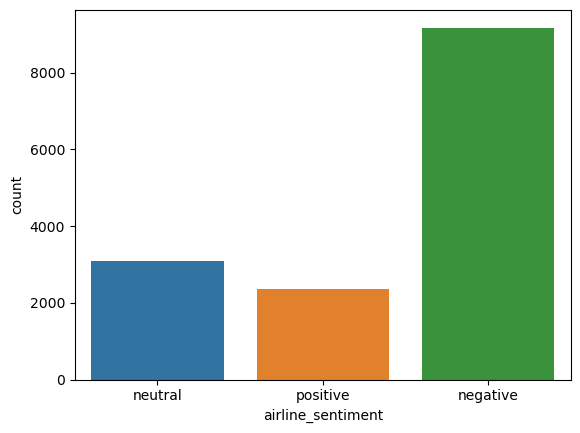

In [50]:
sns.countplot(x=tweets_data['airline_sentiment'])
plt.show()

<Axes: xlabel='airline'>

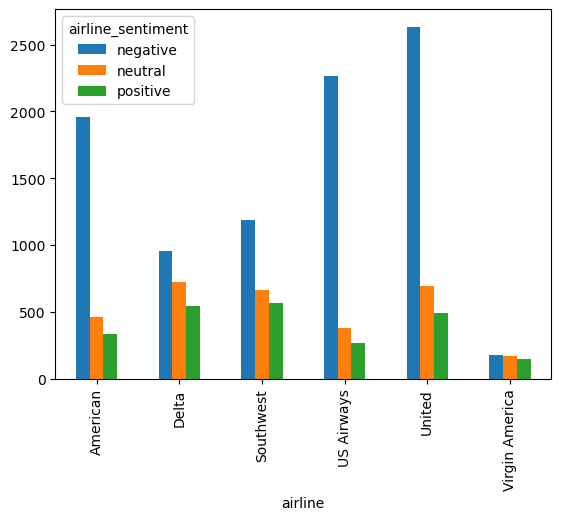

In [66]:
#bivariate
data_airline = tweets_data.groupby('airline')['airline_sentiment'].value_counts()
data_airline.unstack().plot(kind="bar")

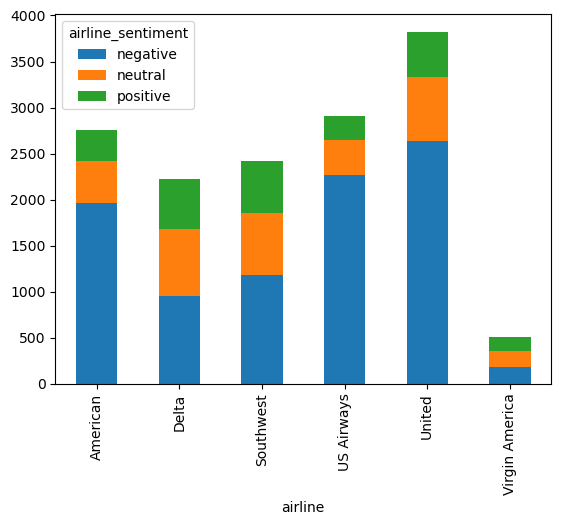

In [64]:
data_airline.unstack().plot(kind="bar",stacked=True)
plt.show()
#stacked bar chart

In [55]:
tweets_data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,year,month,day,week
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015,2,24,9
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015,2,24,9
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015,2,24,9
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015,2,24,9
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015,2,24,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01-08:00,NaN,NaN,2015,2,22,8
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46-08:00,Texas,NaN,2015,2,22,8
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15-08:00,"Nigeria,lagos",NaN,2015,2,22,8
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02-08:00,New Jersey,Eastern Time (US & Canada),2015,2,22,8
